In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../../datasets/built_dataset.csv")
df.info() #Gives Information about null data and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475428 entries, 0 to 475427
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  475428 non-null  object 
 1   category_name              475428 non-null  object 
 2   date                       475428 non-null  object 
 3   time                       475428 non-null  object 
 4   item_code                  475428 non-null  int64  
 5   quantity_sold_kg           475428 non-null  float64
 6   unit_selling_price_rmb/kg  475428 non-null  float64
 7   sale_or_return             475428 non-null  object 
 8   discount                   475428 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 32.6+ MB


In [5]:
df = df.drop(columns=['item_code', 'unit_selling_price_rmb/kg', 'sale_or_return', 'discount', 'date', 'time'])

In [6]:
df.shape

(475428, 3)

In [7]:
#Returned Items are recorded with a negative quantity value
#Getting the number of positive and negative values
(df['quantity_sold_kg']>0).sum(), (df['quantity_sold_kg']<0).sum()

(475174, 254)

In [8]:
#Removing all the rows with negative quantity sold
#for i in range(df.shape[0]):
#    if df.at[i, 'Quantity Sold (kilo)']<0:
#        df.drop(i, inplace=True)
#

df = df[df['quantity_sold_kg'] > 0]
df.shape

(475174, 3)

In [9]:
#Rounding the Quantity to 1 decimal place
df['quantity_sold_kg'] = df['quantity_sold_kg'].round(1)
df.sample()

,item_name,category_name,quantity_sold_kg
474296,wuhu green pepper,capsicum,0.5


In [10]:
#Finding the number of values that got rounded to zero
(df['quantity_sold_kg'] == 0).sum()

2479

In [11]:
#Making df have only quantity values that are not zero
# Rounding to 1 decimal point can cause certain values to become equal to zero
df = df[df['quantity_sold_kg'] != 0]

In [12]:
df.shape

(472695, 3)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\TUF\AppData\Local\Temp\ipykernel_18752\2690050114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity_sold_kg']) #Graph is right skewed and to observe the outliers better boxplot  can be used


<Axes: xlabel='quantity_sold_kg', ylabel='Density'>

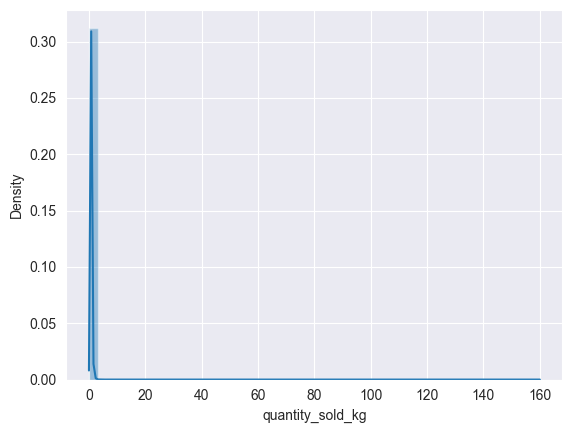

In [14]:
sns.distplot(df['quantity_sold_kg']) #Graph is right skewed and to observe the outliers better boxplot  can be used

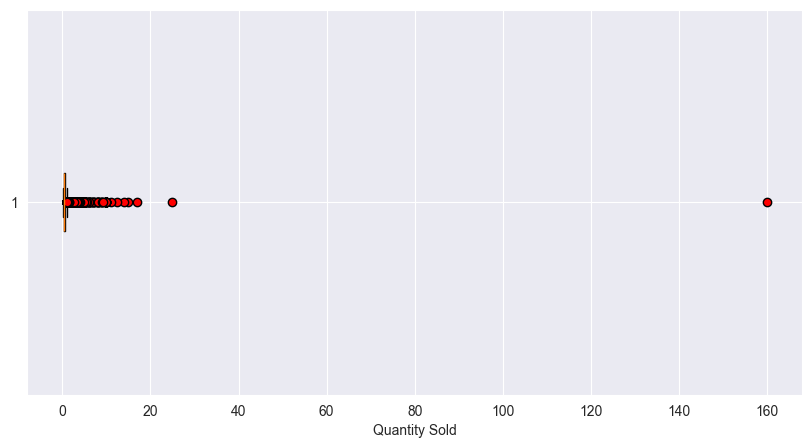

In [15]:
#Visualizing the outliers using boxplot
plt.figure(figsize=(10,5))
plt.boxplot(df['quantity_sold_kg'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('Quantity Sold')
plt.show()

In [16]:
#Mean before handling the outliers
print(df['quantity_sold_kg'].mean())

0.504880948603222


In [17]:
#Defining the limits
upper_limit = df['quantity_sold_kg'].mean() + 3*df['quantity_sold_kg'].std()
lower_limit = df['quantity_sold_kg'].mean() - 3*df['quantity_sold_kg'].std()
print('Upper limit: ',upper_limit,' lower limit: ',lower_limit)

Upper limit:  1.7436494665294144  lower limit:  -0.7338875693229705


In [18]:
#Finding the outliers
df.loc[(df['quantity_sold_kg'] > upper_limit) | (df['quantity_sold_kg'] < lower_limit)]

,item_name,category_name,quantity_sold_kg
128,net lotus root,aquatic,1.8
361,net lotus root,aquatic,3.1
498,zhijiang red bolt,flower,1.8
582,water chestnut,aquatic,2.0
614,net lotus root,aquatic,1.8
...,...,...,...
474686,net lotus root,aquatic,2.3
474838,net lotus root,aquatic,1.8
474856,net lotus root,aquatic,2.0
475064,net lotus root,aquatic,2.1


In [19]:
df_filtered = df.loc[(df['quantity_sold_kg'] < upper_limit) & (df['quantity_sold_kg'] > lower_limit)]

In [20]:
len(df),len(df_filtered),len(df)-len(df_filtered)

(472695, 470898, 1797)

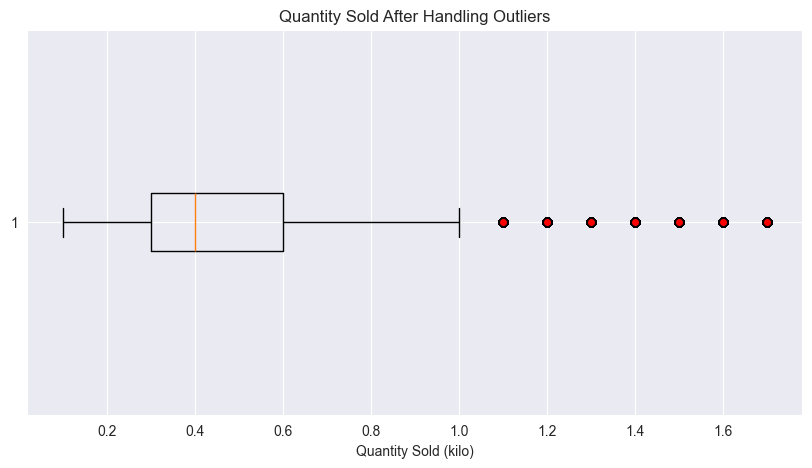

In [21]:
#After handling outliers
plt.figure(figsize=(10,5))
plt.boxplot(df_filtered['quantity_sold_kg'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('Quantity Sold (kilo)')
plt.title('Quantity Sold After Handling Outliers')
plt.show()

In [22]:
#Further Handling Outliers
#df_filtered = df[df['Quantity Sold (kilo)'] < 1] #Removing everything above 20

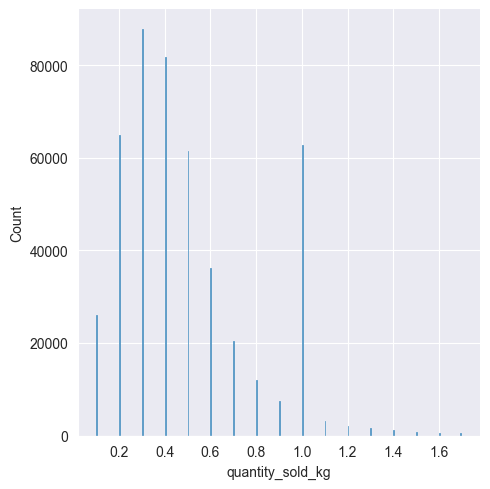

In [23]:
sns.displot(df_filtered['quantity_sold_kg'])

In [24]:
print(df_filtered['quantity_sold_kg'].mean()) # Mean value has only slightly changed

0.4954387149658737


In [25]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470898 entries, 0 to 475427
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         470898 non-null  object 
 1   category_name     470898 non-null  object 
 2   quantity_sold_kg  470898 non-null  float64
dtypes: float64(1), object(2)
memory usage: 14.4+ MB


In [26]:
#Handling the index number error 
#There are 729881 entries but the index goes till 737336
df_final = df_filtered.reset_index(drop=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470898 entries, 0 to 470897
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         470898 non-null  object 
 1   category_name     470898 non-null  object 
 2   quantity_sold_kg  470898 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.8+ MB


In [27]:
#Encoding
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#df_final['Item Name'] = le.fit_transform(df['Item Name'])
#df_final['Category Name'] = le.fit_transform(df['Category Name'])

In [28]:
#df_final = pd.get_dummies(df_final) #One Hot Encoding method

In [29]:
df_final.to_csv('../../datasets/annex/pre_processed_data.csv', index=False)